<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as pty

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving caracteristiques_vins.csv to caracteristiques_vins.csv
Saving erp.xlsx to erp.xlsx
Saving liaison.xlsx to liaison.xlsx
Saving web.xlsx to web.xlsx


In [5]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

In [6]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()

#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [8]:
#Vous avez dû constater que les champs sont séparées par des point-virgule
print("Les champs ne sont pas seuelement séparé par des point-virgules, mais aussi par des virgule et des tabulations:", [";", ",","\t"])

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

Les champs ne sont pas seuelement séparé par des point-virgules, mais aussi par des virgule et des tabulations: [';', ',', '\t']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 17: invalid continuation byte

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [8]:
#Importation de la bibilothèque
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [9]:
#Identification de l'encodage du fichier
chardet.detect(file)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [10]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("-")
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
-
Le tableau comporte 5 colonne(s)


In [12]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [13]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [14]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.loc[df_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


***Commentaire de résultat :***

Après l'étape de vérification des doublons, on note l'absence complète de lignes doublons dans le fichier de l'Entreprise de Resource Planning. Ce dernier démontre l'unicité de la variable "*Product_id*" pour l'enregistrement de notre catalogue d'articles.

In [15]:
#Afficher les valeurs distinctes de la colonne stock_status
distinct_stock_status = df_erp['stock_status'].unique()
print("les valeurs uniques de la colone stock_status sont:",  distinct_stock_status)

print("-")

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("la variable stock_status est liée uniquement à la variable",'stock_quantity')

les valeurs uniques de la colone stock_status sont: ['outofstock' 'instock']
-
la variable stock_status est liée uniquement à la variable stock_quantity


In [16]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

# Création d'une fonction qui déterminera la avleur ou la modalité de "stock_status_2"
def determine_stock_status(row):
  if row['stock_quantity'] == 0 :
      return 'outofstock'
  else:
      return 'instock'

# Appliquer cette fonction au DataFrame erp.xlsx
df_erp['stock_status_2'] = df_erp.apply(lambda row : determine_stock_status(row), axis = 1)

# Afficher la nouvelle df_erp
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [17]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [18]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

Valuer_egal =(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

print("le nombre de valeur égale entrentre les deux stock_status est :", Valuer_egal)

le nombre de valeur égale entrentre les deux stock_status est : 824


***Commentaire de résultat :***

En comparant les deux colonnes de "*Stock_statuts* ", on note une différence d'une ligne. soit nous avons une erreur dans la colonne dans le fichier récupéré par l'entreprise ou nous avons commis une erreur dans la création de la nouvelle version de la variable "*Stock_statuts_2* "

In [19]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

df_erp.loc[~(df_erp["stock_status"] == df_erp["stock_status_2"]), :]

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
443,4954,1,25.0,0,instock,outofstock


***Commentaire du résultat :***

Seule la ligne 443 diverge entre le deux variables "*Stock_statuts*" et le vérification sur la variable "*Stock_quantity*" démontre que c'est une mauvaise gestion du fichier.

Pour corriger cette ligne, nous avons deux alternatives à savoir la première option est la correction de cette ligne (déjà réalisé avec la nouvelle variable "*Stock_statuts_2*") ou soit la deuxième option qui est la suppression de cette ligne .

In [20]:
#Corriger la ou les données incohérentes
df_erp = df_erp.drop(df_erp[~(df_erp["stock_status"] == df_erp["stock_status_2"])].index)
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      824 non-null    int64  
 1   onsale_web      824 non-null    int64  
 2   price           824 non-null    float64
 3   stock_quantity  824 non-null    int64  
 4   stock_status    824 non-null    object 
 5   stock_status_2  824 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


***Commentaire : Bilan de l'exploration des colonnes***

Après contrôle et traitement des plausibles erreurs, on se retrouve avec une base complète de 824 observations et 6 colonnes donnant une vision d'ensemble sur la gestion des stocks de notre Entreprise (***bottleneck fine wine spirit***).

Dans les lignes à suivre, nous entamons la seconde phase de l'exploitation qui consiste à analyser les données brutes contenues dans les variables.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [21]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
prix_non_renseignes = df_erp['price'].isnull().sum()
prix_negatif = (df_erp['price'] <=0).sum()
prix_nul = (df_erp['price'] == 0).sum()

# Cumule de toutes les contrôles réalisés sur la variable "price"
prix_a_probleme = prix_negatif + prix_non_renseignes + prix_nul

print(" ")

# Affichage du résultat de contrôle
print("l'ensemble des prix non renseignés, négatif ou nul :", prix_a_probleme )

print(" ")

#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(prix_non_renseignes)) #Saisir l'instruction manquante dans la fonction format

print(" ")

#Afficher le prix minimum de la colonne "price"
print("le prix minimun inscrit dans la colonne 'price' est : {} €".format(df_erp['price'].min()))

print(" ")

#Afficher le prix maximum de la colonne "price"
print("Le prix maximum inscrit dans la colonne 'price' est : {} €".format(df_erp['price'].max()))

 
l'ensemble des prix non renseignés, négatif ou nul : 0
 
Nombres d'article avec un prix non renseignés: 0
 
le prix minimun inscrit dans la colonne 'price' est : 5.2 €
 
Le prix maximum inscrit dans la colonne 'price' est : 225.0 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [22]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum des produits de la colonne 'stock_quantity' est : {} unité(s)".format(df_erp['stock_quantity'].min()))

print("-") # séparation entre l'affichage des résultats

#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximum des produits de la colonne 'stock_quantity' est : {} unité(s)".format(df_erp['stock_quantity'].max()))

La quantité minimum des produits de la colonne 'stock_quantity' est : 0 unité(s)
-
La quantité maximum des produits de la colonne 'stock_quantity' est : 578 unité(s)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [23]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()

array([1, 0])

In [24]:
df_erp.loc[df_erp['onsale_web'] == 1, 'onsale_web'] = "Oui"
df_erp.loc[df_erp['onsale_web'] == 0, 'onsale_web'] = "Non"

df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,Oui,24.2,0,outofstock,outofstock
1,3849,Oui,34.3,0,outofstock,outofstock
2,3850,Oui,20.8,0,outofstock,outofstock
3,4032,Oui,14.1,0,outofstock,outofstock
4,4039,Oui,46.0,0,outofstock,outofstock


***Commentaire sur l'interprétation du résultats :***

Cette information nous indique que nous sommes devant une variable de type booléen répondant par (True or False) équivanlent de (Vrai ou Faux) ou encore (Oui ou Non). Dans notre cas , elle nous notifie si l'article de nos clients sont présents sur le site web ou pas.

In [25]:
#Quelles sont les colonnes à conserver selon vous?
print("voici la liste des colonnes à garder dans la table df_erp : {}".format(df_erp.columns[~df_erp.columns.isin(['stock_status'])]))

voici la liste des colonnes à garder dans la table df_erp : Index(['product_id', 'onsale_web', 'price', 'stock_quantity',
       'stock_status_2'],
      dtype='object')


**Commentaire de résultat :**

Voici la liste des colonnes à retenir pour la suite de la vérification de la table df_erp :
* Produit_id
* Onsale_web
* price
* stock_quantity
* Stock_status2

Nous ne souhaitons pas conservé la variable "*Stock_status* " en raison du bais d'information contenu par certaine dernière , mais également dans le but d'éviter des redondance.

In [26]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp = df_erp.drop('stock_status', axis = 1)
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status_2
0,3847,Oui,24.2,0,outofstock
1,3849,Oui,34.3,0,outofstock
2,3850,Oui,20.8,0,outofstock
3,4032,Oui,14.1,0,outofstock
4,4039,Oui,46.0,0,outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [27]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))

print("-") # séparateur de résultat

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
-
Le tableau comporte 28 observation(s) ou article(s)


In [28]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

**Commentaire :**

La base de données issue du site web confirme les propos de Lauren sur l'état de maintien des informations sur la commercialisation des produits de l'entreprise. Nous n'avons que l'information à peu près complète pour 1428 observations sur les 1513 que contiennent la base web. On dispose également de variables a moitié remplies ou carrément vide.

In [29]:
#Selon vous, quelles sont les colonnes à conserver ?
Variable_a_retenir_web = df_web.columns[~df_web.columns.isin(['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_content','post_parent','post_password','post_content_filtered','post_mime_type', 'menu_order','comment_count','post_status','ping_status','comment_status'])]
print("Voici la liste des variables à retenir pour la suite de nos analyses : {}".format(Variable_a_retenir_web))

Voici la liste des variables à retenir pour la suite de nos analyses : Index(['sku', 'total_sales', 'post_author', 'post_date', 'post_date_gmt',
       'post_title', 'post_excerpt', 'post_name', 'post_modified',
       'post_modified_gmt', 'guid', 'post_type'],
      dtype='object')


***Commentaire de résultat :***

outes les colonnes au moins 1428 valeurs de réponses. Voici la liste des informations a supprimée :

* virtual
* downloadable
* rating_count
* tax_status
* tax_class
* post_content
* post_parent
* post_password
* post_content_filtered
* post_mime_type
* menu_order
* comment_count
* post_status
* ping_status
* comment_status

In [30]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
colonnes_a_supprimer =['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_content','post_parent','post_password','post_content_filtered','post_mime_type', 'menu_order','comment_count','post_status','ping_status','comment_status']
df_web = df_web.drop(colonnes_a_supprimer, axis =1)
df_web.head(5)

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [31]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web['sku'].unique()

array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [32]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
Codification = [ modalite
                for modalite in df_web['sku'].unique()
                if len(str(modalite)) != 5]

print("La liste des articles ne respectant pas la codification : {}".format(Codification))

La liste des articles ne respectant pas la codification : ['bon-cadeau-25-euros', 304, 1662, 1360, 1364, 7086, 1366, 6616, nan, 7818, 4679, 9562, 9636, 3506, 3510, 3507, 7819, 3509, 812, 807, 805, 802, 2534, 793, 791, 2179, 804, 41, 798, 2361, 38, 5646, 8344, 3568, 9937, 531, 3383, 8463, 8365, 7033, 523, 7032, 8193, '13127-1']


In [33]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_web[df_web['sku'].isin(Codification)]

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
70,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
72,1662,87.0,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
73,1360,0.0,2.0,2018-02-13 13:26:34,2018-02-13 12:26:34,Champagne Mailly Grand Cru Brut Réserve,"Un oeil jaune d’or iridescent, un nez épanoui ...",champagne-mailly-gc-brut-reserve,2020-08-26 18:05:02,2020-08-26 16:05:02,https://www.bottle-neck.fr/?post_type=product&...,product
75,1364,0.0,2.0,2018-02-13 13:36:44,2018-02-13 12:36:44,Champagne Mailly Grand Cru Brut Rosé,Une somptueuse robe rose lumineuse habille cet...,champagne-mailly-grand-cru-brut-rose,2020-08-08 10:45:03,2020-08-08 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,7033,4.0,2.0,2019-03-13 13:44:44,2019-03-13 12:44:44,Huile d'Olive Extra Vierge Planeta Selezione C...,NaN,huile-olive-planeta-3l,2020-08-27 14:55:02,2020-08-27 12:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1407,523,0.0,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,NaN,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1458,7032,0.0,2.0,2019-07-26 10:27:08,2019-07-26 08:27:08,Planeta Sicilia Passito di Noto 2016,NaN,planeta-sicilia-passito-di-noto-2016,2020-06-27 14:25:03,2020-06-27 12:25:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1499,8193,3.0,2.0,2020-03-04 13:54:12,2020-03-04 12:54:12,Emile Boeckel Crémant Chardonnay Extra Brut 2016,NaN,emile-boeckel-cremant-chardonnay-extra-brut-2016,2020-08-22 10:15:02,2020-08-22 08:15:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


***Commentaire de résultat :***

* Suppression des lignes concernées pour ne travailler qu'avec les lignes sans correspondances en supposant que "*SKU* " est la clé de jointure de notre table par défaut mettant en lien le fichier erp et celui provenant du site web.  

***Actions personnelles réalisables (non appliquer dans la suite du code) :***

In [34]:
## Récupération des index des observations à supprimer
#index_a_supprimer = df_web[df_web['sku'].isin(Codification)].index

## Réinitialisation des index de la base puis sa suppression
#df_web = df_web.drop(index_a_supprimer).reset_index(drop=True)

Nous sommes revenu sur le traitement préconisé au niveau de la variable *"SKU"*, car nous nous sommes rendu compte qu'il existait également des correspondances dans la varaible *"SKU"* disposant d'observation dépassant les 5 caractères. Donc l'erreur dans la variable provient du fait qu'on ait des clés de jointures en string avec un nombre consequent de caractère.

***Fin des actions personnelles et reprise des consignes***

In [35]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web.loc[df_web['sku'].duplicated(keep=False),:]

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


***Commentaire résultat :***

la clé de chaque lignes ou observations de notre dataFrame (df_web) semble ne pas être unique. Les observations ont été répétés un certaines notre de fois jusqu'avoir une nbase composé de plusieurs doublons.

In [36]:
#Identifier les lignes sans code articles
df_web.loc[df_web['sku'].isna(),:]

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
178,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
179,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
227,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
230,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
231,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
793,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
794,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
795,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [37]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_sans_code_sku = df_web.loc[df_web['sku'].isna(),:]

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_sans_code_sku.info()

#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 178 to 796
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   post_author        2 non-null      float64       
 3   post_date          2 non-null      datetime64[ns]
 4   post_date_gmt      2 non-null      datetime64[ns]
 5   post_title         2 non-null      object        
 6   post_excerpt       2 non-null      object        
 7   post_name          2 non-null      object        
 8   post_modified      2 non-null      datetime64[ns]
 9   post_modified_gmt  2 non-null      datetime64[ns]
 10  guid               2 non-null      object        
 11  post_type          2 non-null      object        
dtypes: datetime64[ns](4), float64(2), object(6)
memory usage: 8.6+ KB


**Commentaire de résultat :**

 On observe 85 articles dans le fichier web sans code d'identification. Dans cet ensemble, nous n'avons que deux d'entre elles pocédant des informations sur la totalité de leurs caractéristiques sur le site web.   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [38]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))

print("-")

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
-
Le tableau comporte 2 observation(s) ou article(s)


In [39]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [40]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison.loc[df_liaison['product_id'].duplicated(keep = False), :]

,product_id,id_web


**Commentaire de résultat:**

La variable 'product_id' ne dispose pas de doublons dans la table liaison crée par Sylvie.

In [41]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison.loc[df_liaison['id_web'].duplicated(keep = False), :]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


**Commentaire de résultat:**

les doublons détectés sont des lignes "*id_web* " pour lesquels nous avons pas de correspondances dans la colonne "*product_id* ". Ceux ne sont pas de réels mais toutefois parce que python met **NaN** pour les cellules vides.

In [42]:
#Avons-nous des articles sans correspondances?


**Commentaire de résultat :**

Oui, nous avons près de 91 produits provenant de la table fournit par l'entreprise de gestion de notre clientèle qui ne disposent pas de correspondance dans la table faisont étalage de notre catalogue web.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [43]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_caracteristiques.shape[0]))

print("-")

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_caracteristiques.shape[1]))

Le tableau comporte 611 observation(s) ou article(s)
-
Le tableau comporte 13 observation(s) ou article(s)


In [44]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine                  577 non-null    object 
 4   Appellation              559 non-null    object 
 5   Couleur                  566 non-null    object 
 6   Cépage                   571 non-null    object 
 7   Millésime                541 non-null    float64
 8   Garde                    569 non-null    object 
 9   Contenance               611 non-null    object 
 10  Degré d'alcool           586 non-null    object 
 11  Température dégustation  574 non-null    object 
 12  Alliance mets            574 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.2+ KB


In [45]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [46]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.loc[df_caracteristiques.isna().any(axis=1)]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [47]:
#Est-il possible de corriger les données manquantes?

# Vérifiction des doublons dans la table des caractéristiques
df_caracteristiques.loc[df_caracteristiques['post_name'].duplicated(keep= False ),:]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets


**Commentaire de résultat :**

  En analysant l'ensemble des données manquantes, nous estimons qu'il n'est pas possible de corriger les données de la table caractéristiques des vins. On propose de ne pas corriger les données de cette table, car toutes les informations présentes dans celle-ci sont indisposables pour la suite de nos analyses. En plus de cela, les observations de celles-ci sont unitaires donc pas de possibilités de les corrigées avec lles actions précaunisées dans le cas des lignes doublons.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [48]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on = 'product_id', how= 'left')
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web
0,3847,Oui,24.2,0,outofstock,15298
1,3849,Oui,34.3,0,outofstock,15296
2,3850,Oui,20.8,0,outofstock,15300
3,4032,Oui,14.1,0,outofstock,19814
4,4039,Oui,46.0,0,outofstock,19815


In [49]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.loc[df_merge.isna().any(axis=1)]

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web
19,4055,Non,86.1,0,outofstock,NaN
49,4090,Non,73.0,0,outofstock,NaN
50,4092,Non,47.0,0,outofstock,NaN
119,4195,Non,14.1,0,outofstock,NaN
131,4209,Non,73.5,0,outofstock,NaN
...,...,...,...,...,...,...
816,7196,Non,31.0,55,instock,NaN
817,7200,Non,31.0,6,instock,NaN
818,7201,Non,31.0,18,instock,NaN
819,7203,Non,45.0,30,instock,NaN


**Commentaire  de résultat:**

 Oui, sans grande suprise nous avons des lignes du fichier erp et web qui ne matchent pas ensembles. ceux sont des produits n'ayant pas été mise en vente sur le site de l'entreprise.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [50]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge, df_web, left_on='id_web',right_on= 'sku', how='left')
display(df_merge)

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
9177,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
9178,7329,Non,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9179,7338,Oui,16.3,45,instock,16230,16230,0.0,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product


In [51]:
#Avons-nous des lignes sans correspondances?
df_merge.loc[df_merge['sku'].isna(),:]

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
38,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
39,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
40,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
41,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
42,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9173,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9174,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9175,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN


**Commentaire de résultat** :

Oui nous avons des observations qui ne correspondent pas , elles proviennent principalement du problème de mise à jour de la base du site web. Toutes les non-correspondances sont celles qui ne sont pas sur le site.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [52]:
#Fusion de la table df_merge et df_caracteristiques
df_merge = pd.merge(df_merge, df_caracteristiques, on='post_name', how='left')
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
2,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
3,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
4,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"


***Actions personnelles entreprises et réalisées pour la suite des analyses***


In [53]:
## Vérification des observations sans correspondances avec la dernière base compilée
df_merge.loc[df_merge['post_name'].isna(),:]

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
38,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9173,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9174,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9175,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
## Affichage des caractéristiques de la dernière version du fichier df_merge
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9181 entries, 0 to 9180
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               9181 non-null   int64         
 1   onsale_web               9181 non-null   object        
 2   price                    9181 non-null   float64       
 3   stock_quantity           9181 non-null   int64         
 4   stock_status_2           9181 non-null   object        
 5   id_web                   1446 non-null   object        
 6   sku                      1426 non-null   object        
 7   total_sales              1608 non-null   float64       
 8   post_author              1608 non-null   float64       
 9   post_date                1608 non-null   datetime64[ns]
 10  post_date_gmt            1608 non-null   datetime64[ns]
 11  post_title               1608 non-null   object        
 12  post_excerpt             895 non-n

**Quelques travaux contrôles supplémentaires pour améliorer la qualité de la données en fonction des jointures réalisées**


1- Vérification des doublons en fonction des variables de jointures pour choisir celle à partir de laquelle on supprimera les doublons

*  product_id / id_web
*  ib_web / sku
*  post_name

2- Suppression des observations sans correspondances

In [55]:
Verif1 = df_merge.loc[df_merge['product_id'].duplicated (keep = False), :]
display(Verif1)

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
2,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
3,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
4,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9176,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9177,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9179,7338,Oui,16.3,45,instock,16230,16230,0.0,2.0,2020-07-20 11:00:00,...,Saint-Nicolas,NaN,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons"


In [56]:
Verif2 = df_merge.loc[df_merge['sku'].duplicated (keep = False), :]
display(Verif2)

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
2,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
3,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
4,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9177,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9178,7329,Non,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9179,7338,Oui,16.3,45,instock,16230,16230,0.0,2.0,2020-07-20 11:00:00,...,Saint-Nicolas,NaN,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons"


In [57]:
Verif3 = df_merge.loc[df_merge['post_name'].duplicated (keep = False), :]
display(Verif3)

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
2,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
3,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
4,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9177,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9178,7329,Non,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9179,7338,Oui,16.3,45,instock,16230,16230,0.0,2.0,2020-07-20 11:00:00,...,Saint-Nicolas,NaN,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons"


***Complémets d'explications :***

 Après contrôle sur les trois clés de jointures, on remarque que nous avons les mêmes résultats pour toutes les observations ; donc nous pouvons supprimer les doublons présent dans notre DataFrame df_merge en utilisant l'une des clés de jointures.

In [58]:
df_merge = df_merge.drop_duplicates(subset=['product_id']).reset_index(drop = True)
#df_merge = df_merge.reset_index(drop = True)
display(df_merge)

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,Oui,24.2,0,outofstock,15298,15298,6.0,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3849,Oui,34.3,0,outofstock,15296,15296,0.0,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,3850,Oui,20.8,0,outofstock,15300,15300,0.0,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,4032,Oui,14.1,0,outofstock,19814,19814,3.0,2.0,2018-02-09 14:01:05,...,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,4039,Oui,46.0,0,outofstock,19815,19815,0.0,2.0,2018-02-12 09:04:37,...,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,7203,Non,45.0,30,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7247,Oui,54.8,23,instock,13127-1,13127-1,0.0,2.0,2020-06-09 15:42:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7329,Non,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
## Vérication qu'après les suppressions des doublons que j'ai quand même des infromations sur des articles qui ne sont pas sur le site web
df_merge.loc[df_merge['onsale_web']== "Non"]

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
19,4055,Non,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,4090,Non,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,4092,Non,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,4195,Non,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,4209,Non,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,7200,Non,31.0,6,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,7201,Non,31.0,18,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,7203,Non,45.0,30,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,7204,Non,45.0,9,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
## Redécouverte des caractéristiques de la nouvelle base de données df_merge
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               824 non-null    int64         
 1   onsale_web               824 non-null    object        
 2   price                    824 non-null    float64       
 3   stock_quantity           824 non-null    int64         
 4   stock_status_2           824 non-null    object        
 5   id_web                   733 non-null    object        
 6   sku                      713 non-null    object        
 7   total_sales              713 non-null    float64       
 8   post_author              713 non-null    float64       
 9   post_date                713 non-null    datetime64[ns]
 10  post_date_gmt            713 non-null    datetime64[ns]
 11  post_title               713 non-null    object        
 12  post_excerpt             713 non-nul

***Synthèse des raisons des actions entreprises :***

* la présence d'un nombre de lignes dépassant celles du fichier initial d'analyse ;

* colonnes de clés non uniques au niveau de certains de nos fichiers d'exploitation ***(df_web ou df_caracteristiques_vins)*** ;

* Augmentation anomale d'un nombre de lignes ayant comme identifiant des valeurs vides ***NaN*** ;


***Fin des actions personnelles entreprises et utiles pour les analyses à venir***

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

Text(0.5, 1.0, 'Boîte à moustache de la répartition des prix')

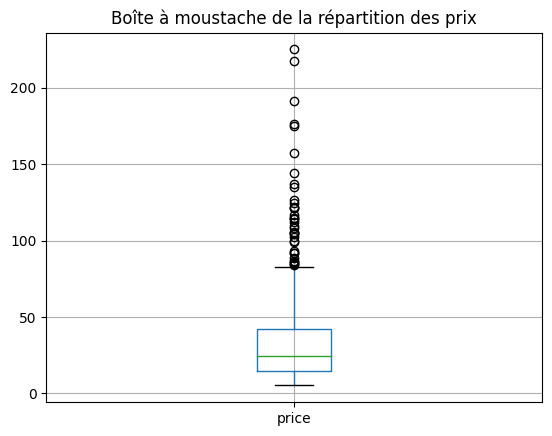

In [61]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column = 'price').set_title("Boîte à moustache de la répartition des prix")

***Commentaire d'observation :***

La boîte à moustache rélève un nombre relativement important d'outliers dans notre table de données.

In [62]:
#Autre méthode avec plotly express
fig = pty.box(df_merge, y ='price',
              title = "Boîte à moustache de la répartition des prix",
              width = 500,
              height = 800 )
fig.show()

***Commentaire de résultat :***

La distribution du prix des bouteilles de vins révèle une répartition asymétrie  à droite du prix des bouteilles dans le quartile inférieur.

les prix sont compris entre 5,2 € et 83 € pour la distribution normale des valeurs

la moitié de nos bouteilles sont compris dans un intervalle de 28 €

La moitié de nos bouteilles coûte moins de 24,35 €

In [63]:
fig = pty.box(df_merge,
              y ='price', x = 'onsale_web',
              points = "all",
              color = 'onsale_web',
              title = "Boîte à moustache de la répartition des prix",
              width = 500,
              height = 800)
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [64]:
#Calculer la moyenne du prix
Prix_moyen = round(df_merge['price'].mean(), 2)
print("Le prix moyenne de commercialisation de nos bouteilles de vins est : {} euros".format(Prix_moyen))

print("-")
#Calculer l'écart-type du prix
Ecart_type_prix = round(df_merge['price'].std(), 2)
print("l'écart moyen des prix de nos bouteilles par rapport au prix de moyen de nos vins est : {} euros".format(Ecart_type_prix))

#Calculer le Z-score
df_merge['Score_Z'] = (df_merge['price']-Prix_moyen)/Ecart_type_prix
df_merge['Score_Z'].head()

Le prix moyenne de commercialisation de nos bouteilles de vins est : 32.42 euros
-
l'écart moyen des prix de nos bouteilles par rapport au prix de moyen de nos vins est : 26.81 euros


0   -0.306602
1    0.070123
2   -0.433420
3   -0.683327
4    0.506527
Name: Score_Z, dtype: float64

***Complément d'information :***

 La Z-score (ou score Z) est une mesure de la position d'une valeur dans une distribution par rapport à la moyenne de cette distribution, exprimée en termes d'écart-types.

In [65]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge[df_merge['Score_Z']>3]['price']

208    225.0
210    126.5
227    176.0
230    157.0
242    144.0
411    137.0
459    217.5
555    124.8
597    175.0
634    191.3
650    122.0
651    114.0
696    135.0
702    116.4
707    115.0
708    121.0
710    115.0
711    121.0
Name: price, dtype: float64

***Commentaire de ce résultat*** :

Grâce à la Z-score, nous pouvons considérer que les valeurs de ces bouteilles sont trop éloignées du prix moyen de notre catalogue de vins. L'ensemble de ces prix peuvent être considéré comme étant les outliers (valeurs aberrentes ou atypiques) dans notre catalogues.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [66]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,product_id,price,stock_quantity,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,Millésime,Score_Z
count,824.000000,824.000000,824.000000,713.000000,713.0,713,713,713,713,541.000000,824.000000
mean,5162.850728,32.424636,26.529126,4.004208,2.0,2018-08-22 06:42:39.412342272,2018-08-22 05:13:57.673211648,2020-06-21 23:00:47.277700096,2020-06-21 21:07:16.057503744,2017.942699,0.000173
min,3847.000000,5.200000,0.000000,0.000000,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,2003.000000,-1.015293
25%,4345.250000,14.575000,1.000000,0.000000,2.0,2018-02-27 14:18:27,2018-02-27 13:18:27,2020-06-19 17:55:02,2020-06-19 15:55:02,2017.000000,-0.665610
50%,4905.500000,24.350000,11.000000,1.000000,2.0,2018-04-19 14:48:15,2018-04-19 12:48:15,2020-08-04 09:30:07,2020-08-04 07:30:07,2019.000000,-0.301007
75%,5805.250000,42.025000,34.000000,4.000000,2.0,2019-01-31 14:39:08,2019-01-31 13:39:08,2020-08-25 10:35:02,2020-08-25 08:35:02,2020.000000,0.358262
max,7338.000000,225.000000,578.000000,96.000000,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,2021.000000,7.183141
std,903.163551,26.810876,45.910993,8.521205,0.0,NaN,NaN,NaN,NaN,2.425644,1.000033


In [67]:
#Définissez un seuil pour les articles "outliers" en prix
Articles_outliers = df_merge[df_merge['Score_Z']>3]

#Prix minimum pour considérer un article outlier
Prix_minium_articles_outliers = Articles_outliers['price'].min()

print("le prix de départ pour considérer qu'un article outlier est de : {} euros".format(Prix_minium_articles_outliers))

le prix de départ pour considérer qu'un article outlier est de : 114.0 euros


In [68]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
effectifs = Articles_outliers['post_name'].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns = ['post_name'])
tab["Effectif"] = effectifs.values
tab["Fréquence"] = round(tab["Effectif"] / len(Articles_outliers),3)

display(tab)

,post_name,Effectif,Fréquence
0,champagne-egly-ouriet-grand-cru-millesime-2008,1,0.056
1,wemyss-malts-single-cask-scotch-whisky-choc-n-...,1,0.056
2,domaine-des-comtes-lafon-volnay-1er-cru-champa...,1,0.056
3,domaine-des-comtes-lafon-volnay-1er-cru-santen...,1,0.056
4,domaine-des-comtes-lafon-volnay-1er-cru-santen...,1,0.056
5,domaine-clerget-echezeaux-en-orveaux-2015,1,0.056
6,champagne-gosset-celebris-vintage-2007,1,0.056
7,wemyss-malts-single-cask-scotch-whisky-chai-ca...,1,0.056
8,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,1,0.056
9,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1,0.056


In [69]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


***Commentaire de résultat :***

Selon moi, le terme **outlier** n'est pas approprié pour les valeurs atypiques de notre base. Elles ne sont pas hors du champ d'analyse en raison du caractère prestigeux dont jouie l'entreprise pour proposer des bouteilles d'une certaine qualité avec les prix qui y sont associés.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [70]:
##############################
# Calculer le CA sur site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA par article'] = round(df_merge['price']*df_merge['total_sales'],2)

#Calculez la somme de la colonne "ca_par_article"
CA_total= df_merge.loc[df_merge['onsale_web']== "Oui"]['CA par article'].sum()

#Ce résultat correspond au chiffre d'affaire du site web
print("le Chiffre d'affaire des ventes des articles du site web s'élève à une valeur de {} euros ".format(CA_total))

le Chiffre d'affaire des ventes des articles du site web s'élève à une valeur de 70318.6 euros 


In [71]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge = df_merge.sort_values('CA par article', ascending =  False).reset_index(drop = True)

#Afficher les 20 premier articles en CA
Top_20_articles = df_merge.head(20)
display(Top_20_articles)

#Graphique en barre des 20 premiers articles avec plotly express
fig = pty.bar(Top_20_articles,
              y='post_name',
              x='CA par article',
              title="Top 20 des articles en chiffre d'affaires",
              category_orders ={'post_name': Top_20_articles['post_name']},
              text = 'CA par article',
              width = 800,
              height = 800)
fig.show()

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,Score_Z,CA par article
0,4334,Oui,49.0,0,outofstock,7818,7818,96.0,2.0,2018-03-01 14:02:44,...,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",0.618426,4704.0
1,4144,Oui,49.0,11,instock,1662,1662,87.0,2.0,2018-02-13 13:17:25,...,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",0.618426,4263.0
2,4402,Oui,176.0,8,instock,3510,3510,13.0,2.0,2018-03-22 11:21:05,...,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.355464,2288.0
3,4142,Oui,53.0,8,instock,11641,11641,30.0,2.0,2018-02-13 13:08:44,...,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",0.767624,1590.0
4,4141,Oui,39.0,1,instock,304,304,40.0,2.0,2018-02-13 12:57:44,...,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",0.245431,1560.0
5,4355,Oui,126.5,2,instock,12589,12589,11.0,2.0,2018-03-02 10:46:10,...,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.509138,1391.5
6,4352,Oui,225.0,0,outofstock,15940,15940,5.0,2.0,2018-03-02 10:30:04,...,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",7.183141,1125.0
7,4153,Oui,29.0,0,outofstock,16237,16237,36.0,2.0,2018-02-13 14:13:53,...,Rouge,"Abouriou, Cabernet Franc, Cabernet Sauvignon, ...",2014.0,10-15 ans,75cl,13%,16°C,"Gibier, Grillades, Viande rouge",-0.127564,1044.0
8,6206,Oui,25.2,120,instock,16580,16580,41.0,2.0,2019-07-24 09:31:48,...,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.269302,1033.2
9,4068,Oui,16.6,157,instock,16416,16416,62.0,2.0,2018-02-12 13:42:28,...,Rouge,100% Syrah,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",-0.590078,1029.2


In [72]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['Part CA par article'] = round(df_merge['CA par article']/CA_total,2)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Cumule CA par article'] = df_merge['Part CA par article'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
article_80_pourcent_CA = df_merge[df_merge['Cumule CA par article'] <= 0.8].shape[0]
print("le nombre d'article représentant 80 % du Chiffre d'affaire est {}".format(article_80_pourcent_CA))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_catalogue = round((df_merge.loc[df_merge['onsale_web']=="Oui"].shape[0] / df_merge.shape[0])*100.0,2)
print("-")
print("le pourcentage des articles du catalogue Web est de {} %".format(proportion_catalogue))

le nombre d'article représentant 80 % du Chiffre d'affaire est 713
-
le pourcentage des articles du catalogue Web est de 86.89 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [73]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge = df_merge.sort_values('total_sales', ascending= False).reset_index(drop = True )

#Afficher les 20 premier articles en quantité
Top_20_quantity = df_merge.head(20)
display(Top_20_quantity)

#Graphique en barre des 20 premiers articles avec plotly express
fig2 = pty.bar(Top_20_quantity,
               y='post_name',
               x='total_sales',
               title="Top 20 des articles en quantité",
               category_orders ={'post_name': Top_20_quantity['post_name']},
               text = 'total_sales',
               width = 800,
              height = 800)
fig2.show()

,product_id,onsale_web,price,stock_quantity,stock_status_2,id_web,sku,total_sales,post_author,post_date,...,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,Score_Z,CA par article,Part CA par article,Cumule CA par article
0,4334,Oui,49.0,0,outofstock,7818,7818,96.0,2.0,2018-03-01 14:02:44,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",0.618426,4704.0,0.07,0.07
1,4144,Oui,49.0,11,instock,1662,1662,87.0,2.0,2018-02-13 13:17:25,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",0.618426,4263.0,0.06,0.13
2,4068,Oui,16.6,157,instock,16416,16416,62.0,2.0,2018-02-12 13:42:28,...,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",-0.590078,1029.2,0.01,0.27
3,4200,Oui,5.8,190,instock,16295,16295,46.0,2.0,2018-02-15 14:05:06,...,2021.0,2 ans,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.992913,266.8,0.00,0.57
4,4172,Oui,5.7,167,instock,16210,16210,43.0,2.0,2018-02-14 16:54:33,...,2021.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",-0.996643,245.1,0.00,0.57
5,4187,Oui,13.3,90,instock,16189,16189,42.0,2.0,2018-02-15 10:10:23,...,2020.0,3-5 ans,75cl,"13,5%",14°C,"Agneau, Charcuterie, Grillades",-0.713167,558.6,0.01,0.43
6,6206,Oui,25.2,120,instock,16580,16580,41.0,2.0,2019-07-24 09:31:48,...,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.269302,1033.2,0.01,0.26
7,4141,Oui,39.0,1,instock,304,304,40.0,2.0,2018-02-13 12:57:44,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",0.245431,1560.0,0.02,0.20
8,6047,Oui,10.9,46,instock,16264,16264,38.0,2.0,2019-05-03 11:18:00,...,2020.0,3 ans,75cl,14%,14°C,"Apéritif, Charcuterie, Volaille",-0.802686,414.2,0.01,0.53
9,4729,Oui,8.6,151,instock,38,38,38.0,2.0,2018-04-18 12:25:58,...,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons",-0.888474,326.8,0.00,0.57


In [74]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['Part quantite'] = round(df_merge['total_sales'] / df_merge['total_sales'].sum() ,2)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Cumule quantite'] = df_merge['Part quantite'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
article_80_pourcent_Quantite = df_merge[df_merge['Cumule quantite'] <= 0.8].shape[0]
print("le nombre d'article représentant 80 % de la quanté est {}".format(article_80_pourcent_Quantite))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = round((df_merge.loc[df_merge['onsale_web']=="Oui"]['stock_quantity'].sum() / df_merge['stock_quantity'].sum())*100.0,2)
print("-")
print("le pourcentage des articles du catalogue Web est de {} %".format(proportion))

le nombre d'article représentant 80 % de la quanté est 713
-
le pourcentage des articles du catalogue Web est de 93.89


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [75]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
from google.colab import files
df_merge.to_excel('df_merge.xlsx')
files.download('df_merge.xlsx')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>